# in the name of Allah


# Diagnosis of Measles Disease Using Image Processing in children under five Afghan children



## the library we are using for this project.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import os
import glob
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten ,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import imgaug.augmenters as iaa
import cv2

In [2]:
import tensorflow as tf

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
#train_image = []
#train_label =[]
#img_size =100

#for dir_path in glob.glob('../dataset/measles/train/*'):
    #label =dir_path.split('\\')[-1]
    #for img_path in os.listdir(dir_path):
        #imgpath =os.path.join(dir_path,img_path)
        #img =cv2.imread(imgpath,cv2.IMREAD_GRAYSCALE)
        #img1 =cv2.resize(img,(img_size,img_size))
        #train_image.append(img)
        #train_label.append(label)


# Spliting Data to train ,test and val and labeling them

In [6]:
import splitfolders

In [7]:
#input_folder = "F:/final_project_material/dataset/measles/train/"
#splitfolders.ratio(input_folder,output='../dataset/measles/',seed=42,ratio=(.7,.2,.1),group_prefix=None)
#print("done Your data has been splited")

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

## Rescaling the dataset

In [10]:
train =ImageDataGenerator(rescale=1./255)
validatoin = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1/255)

In [11]:
train_data = train.flow_from_directory('../dataset/measles/train',
                                      target_size = (224, 224),
                                     classes =['measles','monkeypox','normal','other'],
                                      batch_size =10,)

validation_data = validatoin.flow_from_directory('../dataset/measles/val',
                                      target_size = (224, 224),
                                    classes =['measles','monkeypox','normal','other'],
                                                 batch_size =10,)

test_data = train.flow_from_directory('../dataset/measles/test',
                                       target_size = (224, 224),
                                    classes =['measles','monkeypox','normal','other'],
                                      batch_size =10,)

Found 809 images belonging to 4 classes.
Found 230 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


# Making xtrain and ytrain for SVM & KNN

In [25]:
y=np.concatenate([train_data.next()[1] for i in range(train_data.__len__())])
x=np.concatenate([train_data.next()[0] for i in range(train_data.__len__())])




In [21]:
print(len(x))
print(len(y))

809
809


In [37]:
labels=[]
for label in y:
    labels.append(np.argmax(label))
print(len(labels))
x =x.reshape(len(x),-1)

print(x.shape)


809
(809, 150528)


# Classification via SVM

In [28]:
from sklearn.svm import SVC
model=SVC(C=1,kernel ='poly',gamma='auto')
model.fit(x,labels)

SVC(C=1, gamma='auto', kernel='poly')

# Making xtest and ytest fro SVM & KNN

In [ ]:
ty=np.concatenate([validation_data.next()[1] for i in range(validation_data.__len__())])
tx=np.concatenate([validation_data.next()[0] for i in range(validation_data.__len__())])


In [38]:
tlabels=[]
for label in ty:
    tlabels.append(np.argmax(label))
print(len(tlabels))
tx =tx.reshape(len(tx),-1)

print(tx.shape)


230
(230, 150528)


In [32]:

y_pred = model.predict(tx)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(tlabels,y_pred))
print(classification_report(tlabels,y_pred))
print(accuracy_score(tlabels,y_pred))

[[ 9 15 11  3]
 [13 18 17  7]
 [21 34 38 12]
 [ 3 14 10  5]]
              precision    recall  f1-score   support

           0       0.20      0.24      0.21        38
           1       0.22      0.33      0.26        55
           2       0.50      0.36      0.42       105
           3       0.19      0.16      0.17        32

    accuracy                           0.30       230
   macro avg       0.28      0.27      0.27       230
weighted avg       0.34      0.30      0.31       230

0.30434782608695654


# Classification via KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(x,labels)

KNeighborsClassifier(n_neighbors=7)

In [46]:
y_pred = knn.predict(tx)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(tlabels,y_pred))
print(classification_report(tlabels,y_pred))
print(accuracy_score(tlabels,y_pred))

[[ 6 14 15  3]
 [ 9 22 21  3]
 [15 37 45  8]
 [ 2 14 13  3]]
              precision    recall  f1-score   support

           0       0.19      0.16      0.17        38
           1       0.25      0.40      0.31        55
           2       0.48      0.43      0.45       105
           3       0.18      0.09      0.12        32

    accuracy                           0.33       230
   macro avg       0.27      0.27      0.26       230
weighted avg       0.33      0.33      0.33       230

0.33043478260869563


In [ ]:
classes= ['measles','monkeypox','normal','other']



# Ploting the images

In [ ]:
plt.figure(figsize =(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    random_num =np.random.randint(0,len(xtrain))
    plt.imshow(xtrain[random_num])
    plt.title(classes[np.argmax(ytrain[random_num])])
   
 


# Classification via CNN

In [48]:

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten ,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping


In [49]:
INPUT_SHAPE =(224,224,3)
model =Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Flatten(input_shape =(224,224,3)))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [50]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics =['accuracy']
)
es = EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', verbose=0,
 patience=7,baseline=None,restore_best_weights =True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [51]:
batch_size= 50
history = model.fit(train_data,
                              epochs=5,
                              #steps_per_epoch =  809// batch_size,
                              validation_data=validation_data,
                              callbacks =[es]
                              #validation_steps = 230// batch_size,
                            )

Epoch 1/5
81/81 [==============================] - 159s 2s/step - loss: 0.9908 - accuracy: 0.4536 - val_loss: 0.4837 - val_accuracy: 0.4783
Epoch 2/5
81/81 [==============================] - 172s 2s/step - loss: 0.4165 - accuracy: 0.5785 - val_loss: 0.4904 - val_accuracy: 0.5348
Epoch 3/5
81/81 [==============================] - 238s 3s/step - loss: 0.3011 - accuracy: 0.7466 - val_loss: 0.4727 - val_accuracy: 0.6130
Epoch 4/5
81/81 [==============================] - 183s 2s/step - loss: 0.2025 - accuracy: 0.8554 - val_loss: 0.4870 - val_accuracy: 0.6261
Epoch 5/5
81/81 [==============================] - 159s 2s/step - loss: 0.1371 - accuracy: 0.9061 - val_loss: 0.5571 - val_accuracy: 0.6435


In [52]:
test =model.evaluate(test_data)

12/12 [==============================] - 7s 532ms/step - loss: 0.6064 - accuracy: 0.6083


<AxesSubplot:>

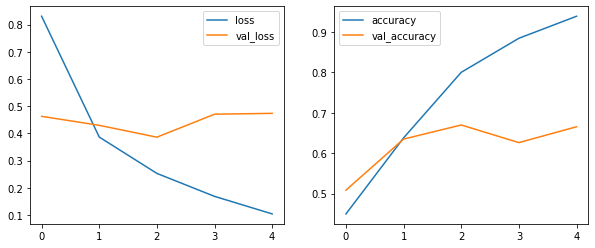

In [14]:
fig, ax =plt.subplots(1,2,figsize =(10,4))
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(kind='line',ax =ax[0])
history_df[['accuracy','val_accuracy']].plot(kind='line',ax=ax[1])

In [15]:
y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])
true_labels=np.argmax(y, axis=-1)

prediction= model.predict(test_data, verbose=2)
prediction=np.argmax(prediction, axis=-1)

12/12 - 6s - 6s/epoch - 487ms/step


In [20]:
y=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])


[[[[0.15294118 0.427451   0.4784314 ]
   [0.14509805 0.43921572 0.52156866]
   [0.18823531 0.49803925 0.627451  ]
   ...
   [0.49803925 0.38431376 0.32941177]
   [0.4431373  0.32941177 0.27450982]
   [0.43137258 0.31764707 0.2627451 ]]

  [[0.18431373 0.46274513 0.54901963]
   [0.14509805 0.43529415 0.54901963]
   [0.18431373 0.49803925 0.63529414]
   ...
   [0.4784314  0.3647059  0.30980393]
   [0.46274513 0.34509805 0.2901961 ]
   [0.47058827 0.3529412  0.29803923]]

  [[0.16078432 0.454902   0.58431375]
   [0.14117648 0.43921572 0.5882353 ]
   [0.15686275 0.4666667  0.61960787]
   ...
   [0.454902   0.32941177 0.2784314 ]
   [0.47058827 0.34509805 0.2901961 ]
   [0.48627454 0.36078432 0.3019608 ]]

  ...

  [[0.14509805 0.34509805 0.47450984]
   [0.06666667 0.2784314  0.4156863 ]
   [0.04313726 0.2627451  0.39607847]
   ...
   [0.12941177 0.3803922  0.5176471 ]
   [0.09803922 0.34901962 0.48627454]
   [0.10588236 0.35686275 0.49411768]]

  [[0.09803922 0.2901961  0.41960788]
   [0.1

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='weighted')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='weighted')
print('F-Measure: %.3f' % score)

Accuracy: 0.658
Precision: 0.686
Recall: 0.658
F-Measure: 0.651


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)
print(cm)
cr = classification_report(y_true=true_labels, y_pred=prediction)
print(cr)

[[14  2  3  1]
 [ 5 17  6  1]
 [ 4  7 42  1]
 [ 2  2  7  6]]
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        20
           1       0.61      0.59      0.60        29
           2       0.72      0.78      0.75        54
           3       0.67      0.35      0.46        17

    accuracy                           0.66       120
   macro avg       0.64      0.60      0.61       120
weighted avg       0.66      0.66      0.65       120



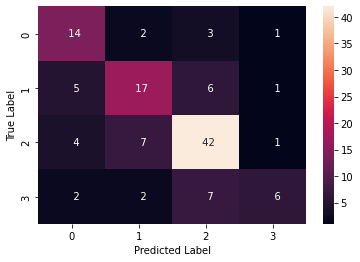

<Figure size 432x288 with 0 Axes>

In [18]:
cm = confusion_matrix(true_labels, prediction)
sns.heatmap(cm, fmt='4',annot=True).set(ylabel="True Label", xlabel="Predicted Label")
plt.show()
plt.savefig('confusion_matrix.jpg')